In [8]:
import pandas as pd

# Percorso del file (usa r"" per evitare problemi con \)
file_path = r"C:\Users\hadia\OneDrive\Desktop\project work foorban\missioni_geography.csv"

# Caricamento dataset
missioni = pd.read_csv(file_path)

# Controllo veloce
missioni.head()



,mission_id,delivery_man_main_user_id,place_id,start_driving_at,started_at,ended_at,completed_at,mission_duration_min,pdvid,provincia,city,regione,hub,hub_address
0,68a65eb9-1758-40dd-93ed-799946e1a9ef,17660,560,29/09/25 07:23,2025-09-29 08:11:00,2025-09-29 09:48:00,29/09/25 09:48,97.0,1104.0,MB,Vimercate,Lombardia,Rho,"Via Magenta, Rho"
1,68a65eb9-1758-40dd-93ed-799946e1a9ef,17660,560,29/09/25 07:23,2025-09-29 08:11:00,2025-09-29 09:48:00,29/09/25 09:48,97.0,1312.0,MB,Vimercate,Lombardia,Rho,"Via Magenta, Rho"
2,68a65eb9-1758-40dd-93ed-799946e1a9ef,17660,560,29/09/25 07:23,2025-09-29 08:11:00,2025-09-29 09:48:00,29/09/25 09:48,97.0,1513.0,MB,Vimercate,Lombardia,Rho,"Via Magenta, Rho"
3,68a65eb9-1758-40dd-93ed-799946e1a9ef,17660,560,29/09/25 07:23,2025-09-29 08:11:00,2025-09-29 09:48:00,29/09/25 09:48,97.0,1699.0,MB,Vimercate,Lombardia,Rho,"Via Magenta, Rho"
4,823e6685-a2e9-405e-861b-375510cbfb9d,17660,872,29/09/25 07:23,2025-09-29 11:30:00,2025-09-29 13:25:00,29/09/25 13:25,115.0,1567.0,MI,Milano,Lombardia,Rho,"Via Magenta, Rho"


In [9]:
missioni.info()
missioni.describe(include="all")
missioni.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10897 entries, 0 to 10896
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mission_id                 10897 non-null  object 
 1   delivery_man_main_user_id  10897 non-null  int64  
 2   place_id                   10897 non-null  int64  
 3   start_driving_at           10897 non-null  object 
 4   started_at                 10897 non-null  object 
 5   ended_at                   10897 non-null  object 
 6   completed_at               10897 non-null  object 
 7   mission_duration_min       10897 non-null  float64
 8   pdvid                      10862 non-null  float64
 9   provincia                  10862 non-null  object 
 10  city                       10862 non-null  object 
 11  regione                    10862 non-null  object 
 12  hub                        10862 non-null  object 
 13  hub_address                10862 non-null  obj

Index(['mission_id', 'delivery_man_main_user_id', 'place_id',
       'start_driving_at', 'started_at', 'ended_at', 'completed_at',
       'mission_duration_min', 'pdvid', 'provincia', 'city', 'regione', 'hub',
       'hub_address'],
      dtype='object')

In [11]:
# Lista colonne datetime
datetime_cols = [
    "start_driving_at",
    "started_at",
    "ended_at",
    "completed_at"
]

# Conversione a datetime
for col in datetime_cols:
    missioni[col] = pd.to_datetime(
        missioni[col],
        errors="coerce",     # evita crash se trova valori sporchi
        dayfirst=True        # formato italiano gg/mm/aaaa
    )

# Controllo finale
missioni[datetime_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10897 entries, 0 to 10896
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   start_driving_at  10897 non-null  datetime64[ns]
 1   started_at        10897 non-null  datetime64[ns]
 2   ended_at          10897 non-null  datetime64[ns]
 3   completed_at      10897 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 340.7 KB


C:\Users\hadia\AppData\Local\Temp\ipykernel_20060\2236753304.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  missioni[col] = pd.to_datetime(
C:\Users\hadia\AppData\Local\Temp\ipykernel_20060\2236753304.py:11: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  missioni[col] = pd.to_datetime(
C:\Users\hadia\AppData\Local\Temp\ipykernel_20060\2236753304.py:11: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  missioni[col] = pd.to_datetime(
C:\Users\hadia\AppData\Local\Temp\ipykernel_20060\2236753304.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is

In [12]:
missioni[datetime_cols].isna().sum()


start_driving_at    0
started_at          0
ended_at            0
completed_at        0
dtype: int64

In [13]:
missioni[
    missioni["completed_at"] < missioni["start_driving_at"]
].head()


,mission_id,delivery_man_main_user_id,place_id,start_driving_at,started_at,ended_at,completed_at,mission_duration_min,pdvid,provincia,city,regione,hub,hub_address


In [14]:
# Drive time: hub → cliente
missioni["drive_time_min"] = (
    missioni["started_at"] - missioni["start_driving_at"]
).dt.total_seconds() / 60

# On-site time: tempo dal cliente
missioni["onsite_time_min"] = (
    missioni["ended_at"] - missioni["started_at"]
).dt.total_seconds() / 60

# Return time: cliente → hub
missioni["return_time_min"] = (
    missioni["completed_at"] - missioni["ended_at"]
).dt.total_seconds() / 60

# Mission cycle time: end-to-end
missioni["mission_cycle_time_min"] = (
    missioni["completed_at"] - missioni["start_driving_at"]
).dt.total_seconds() / 60


In [15]:
missioni[
    [
        "drive_time_min",
        "onsite_time_min",
        "return_time_min",
        "mission_cycle_time_min"
    ]
].describe()


,drive_time_min,onsite_time_min,return_time_min,mission_cycle_time_min
count,10897.000000,10897.000000,10897.000000,10897.000000
mean,98.998073,110.563458,149.158392,358.719923
std,93.647187,402.080213,407.463494,549.061445
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,17.000000,0.000000,199.000000
50%,74.000000,32.000000,91.000000,308.000000
75%,165.000000,84.000000,188.000000,362.000000
max,431.000000,5549.000000,8969.000000,8983.000000


In [17]:
missioni["time_diff_check"] = (
    missioni["drive_time_min"]
    + missioni["onsite_time_min"]
    + missioni["return_time_min"]
    - missioni["mission_cycle_time_min"]
)

missioni["time_diff_check"].describe()


count    10897.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: time_diff_check, dtype: float64

In [18]:
time_cols = [
    "drive_time_min",
    "onsite_time_min",
    "return_time_min",
    "mission_cycle_time_min"
]

# Soglie percentile 99
outlier_thresholds = missioni[time_cols].quantile(0.99)
outlier_thresholds


drive_time_min             341.0
onsite_time_min           1452.0
return_time_min           1522.0
mission_cycle_time_min    3160.0
Name: 0.99, dtype: float64

In [19]:
missioni["is_outlier"] = False

for col in time_cols:
    missioni.loc[
        missioni[col] > outlier_thresholds[col],
        "is_outlier"
    ] = True

# Quante missioni anomale?
missioni["is_outlier"].value_counts()


is_outlier
False    10583
True       314
Name: count, dtype: int64

In [20]:
missioni_clean = missioni[~missioni["is_outlier"]].copy()


In [21]:
courier_kpi = (
    missioni_clean
    .groupby("delivery_man_main_user_id")
    .agg(
        missions_count=("mission_id", "count"),
        avg_drive_min=("drive_time_min", "mean"),
        median_drive_min=("drive_time_min", "median"),
        avg_onsite_min=("onsite_time_min", "mean"),
        avg_return_min=("return_time_min", "mean"),
        avg_cycle_min=("mission_cycle_time_min", "mean")
    )
    .reset_index()
)


In [22]:
courier_kpi = courier_kpi[courier_kpi["missions_count"] >= 20]


In [23]:
courier_kpi["performance_score"] = (
    courier_kpi["avg_drive_min"]
    + courier_kpi["avg_onsite_min"]
    + courier_kpi["avg_return_min"]
)

courier_kpi = courier_kpi.sort_values(
    "performance_score",
    ascending=True
)


In [24]:
top_10_couriers = courier_kpi.head(10)
worst_10_couriers = courier_kpi.tail(10)

top_10_couriers


,delivery_man_main_user_id,missions_count,avg_drive_min,median_drive_min,avg_onsite_min,avg_return_min,avg_cycle_min,performance_score
22,79553,209,65.014354,78.0,33.157895,0.000000,98.172249,98.172249
47,112530,52,0.019231,0.0,30.019231,78.673077,108.711538,108.711538
19,70858,289,99.442907,89.0,26.435986,0.072664,125.951557,125.951557
14,67316,207,131.149758,129.0,28.637681,0.304348,160.091787,160.091787
13,58441,299,99.545151,1.0,61.153846,0.013378,160.712375,160.712375
34,99411,214,140.579439,126.0,19.191589,2.836449,162.607477,162.607477
16,69278,513,65.194932,37.0,81.602339,18.202729,165.000000,165.000000
49,113377,42,39.023810,30.0,41.333333,91.023810,171.380952,171.380952
4,26033,120,79.533333,59.0,75.866667,18.041667,173.441667,173.441667
2,19936,330,115.954545,102.0,59.093939,1.993939,177.042424,177.042424


In [25]:
import pandas as pd

# Percorso file (raw string per Windows)
file_path_servizi = r"C:\Users\hadia\OneDrive\Desktop\project work foorban\servizi_per_missione.csv"

# Caricamento dataset
servizi = pd.read_csv(file_path_servizi)

# Controllo veloce
servizi.head()


,mission_id,total_duration,service_duration_min
0,0008e68c-d6f3-4ee6-bb2f-52223c65d50b,433,7.216667
1,000e7254-1889-44a5-bc8b-8795178cd2dc,935,15.583333
2,00324253-25c5-4e73-b190-56ff21901c84,931,15.516667
3,004afc28-e7e8-44f4-b672-26233ba52a51,548,9.133333
4,004f81fe-cfea-4a94-bc53-2db71649fc64,1692,28.200000


In [26]:
servizi.info()
servizi.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mission_id            2980 non-null   object 
 1   total_duration        2980 non-null   int64  
 2   service_duration_min  2980 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 70.0+ KB


Index(['mission_id', 'total_duration', 'service_duration_min'], dtype='object')

In [27]:
missioni_base = missioni_clean[[
    "mission_id",
    "mission_cycle_time_min",
    "delivery_man_main_user_id"
]].copy()


In [28]:
missioni_servizi = missioni_base.merge(
    servizi,
    on="mission_id",
    how="left"
)


In [29]:
missioni_servizi["service_duration_min"] = (
    missioni_servizi["service_duration_min"]
    .fillna(0)
)

missioni_servizi["idle_time_min"] = (
    missioni_servizi["mission_cycle_time_min"]
    - missioni_servizi["service_duration_min"]
)

# Evitiamo idle negativi (rumore di log)
missioni_servizi["idle_time_min"] = (
    missioni_servizi["idle_time_min"]
    .clip(lower=0)
)


In [30]:
missioni_servizi[[
    "mission_cycle_time_min",
    "service_duration_min",
    "idle_time_min"
]].describe()


,mission_cycle_time_min,service_duration_min,idle_time_min
count,10583.000000,10583.000000,10583.000000
mean,290.103940,69.271791,221.623582
std,185.162361,133.301800,181.278348
min,0.000000,0.000000,0.000000
25%,193.000000,11.075000,97.050000
50%,305.000000,21.816667,244.266667
75%,357.000000,55.491667,308.216667
max,1719.000000,1451.950000,1715.150000


In [31]:
courier_idle_kpi = (
    missioni_servizi
    .groupby("delivery_man_main_user_id")
    .agg(
        missions_count=("mission_id", "count"),
        avg_idle_min=("idle_time_min", "mean"),
        median_idle_min=("idle_time_min", "median"),
        pct_idle_missions=("idle_time_min", lambda x: (x > 0).mean() * 100)
    )
    .reset_index()
)

# Filtriamo corrieri con abbastanza missioni
courier_idle_kpi = courier_idle_kpi[courier_idle_kpi["missions_count"] >= 20]

courier_idle_kpi.sort_values("avg_idle_min").head(10)


,delivery_man_main_user_id,missions_count,avg_idle_min,median_idle_min,pct_idle_missions
30,99177,225,0.246667,0.150000,66.666667
22,79553,209,70.931100,78.133333,84.210526
47,112530,52,82.773077,54.416667,94.230769
19,70858,289,100.484717,89.750000,98.961938
26,87493,180,109.530556,0.258333,83.333333
0,17660,215,109.911860,77.500000,96.279070
16,69278,513,112.518161,75.883333,100.000000
2,19936,330,127.085909,107.966667,97.272727
39,104710,273,131.210806,38.550000,78.021978
49,113377,42,132.852381,141.733333,97.619048


In [33]:
missioni_base = missioni_clean[[
    "mission_id",
    "place_id",                      # 🔑 FONDAMENTALE
    "mission_cycle_time_min",
    "delivery_man_main_user_id"
]].copy()


In [34]:
missioni_servizi = missioni_base.merge(
    servizi,
    on="mission_id",
    how="left"
)


In [35]:
missioni_servizi["service_duration_min"] = (
    missioni_servizi["service_duration_min"].fillna(0)
)

missioni_servizi["idle_time_min"] = (
    missioni_servizi["mission_cycle_time_min"]
    - missioni_servizi["service_duration_min"]
).clip(lower=0)


In [36]:
client_features = (
    missioni_servizi
    .groupby("place_id")
    .agg(
        missions_count=("mission_id", "count"),
        avg_cycle_min=("mission_cycle_time_min", "mean"),
        avg_service_min=("service_duration_min", "mean"),
        avg_idle_min=("idle_time_min", "mean"),
        median_idle_min=("idle_time_min", "median"),
        pct_idle_missions=("idle_time_min", lambda x: (x > 0).mean() * 100)
    )
    .reset_index()
)

client_features.head()


,place_id,missions_count,avg_cycle_min,avg_service_min,avg_idle_min,median_idle_min,pct_idle_missions
0,2,35,268.142857,20.590476,247.552381,284.916667,100.000000
1,7,42,36.142857,8.364286,27.845238,0.716667,71.428571
2,8,72,279.444444,12.366667,267.077778,344.550000,100.000000
3,10,32,328.875000,19.187500,309.687500,324.208333,100.000000
4,12,16,123.250000,8.500000,114.750000,88.041667,100.000000


In [37]:
import pandas as pd

# Percorso file (raw string per Windows)
file_path_geo = r"C:\Users\hadia\OneDrive\Desktop\project work foorban\geography_with_hub.csv"

# Caricamento dataset
geography = pd.read_csv(file_path_geo)

# Controllo veloce
geography.head()


,pdvid,placeid,provincia,city,regione,Hub,Hub_address
0,39,1,MI,Milano,Lombardia,Rho,"Via Magenta, Rho"
1,78,1,MI,Milano,Lombardia,Rho,"Via Magenta, Rho"
2,336,1,MI,Milano,Lombardia,Rho,"Via Magenta, Rho"
3,377,1,MI,Milano,Lombardia,Rho,"Via Magenta, Rho"
4,2,2,MI,Milano,Lombardia,Rho,"Via Magenta, Rho"


In [38]:
geography.info()
geography.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pdvid        1840 non-null   int64 
 1   placeid      1840 non-null   int64 
 2   provincia    1840 non-null   object
 3   city         1840 non-null   object
 4   regione      1836 non-null   object
 5   Hub          1840 non-null   object
 6   Hub_address  1840 non-null   object
dtypes: int64(2), object(5)
memory usage: 100.8+ KB


Index(['pdvid', 'placeid', 'provincia', 'city', 'regione', 'Hub',
       'Hub_address'],
      dtype='object')

In [39]:
geography = geography.rename(columns={"placeid": "place_id"})


In [40]:
geography.columns


Index(['pdvid', 'place_id', 'provincia', 'city', 'regione', 'Hub',
       'Hub_address'],
      dtype='object')

In [41]:
client_features_geo = client_features.merge(
    geography,
    on="place_id",
    how="left"
)


In [42]:
client_features_geo.groupby("Hub")["avg_idle_min"].mean().sort_values()


Hub
Roma                   169.008364
Casalecchio di Reno    255.795305
Rho                    278.465034
Name: avg_idle_min, dtype: float64

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Qualità grafici
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.grid"] = True


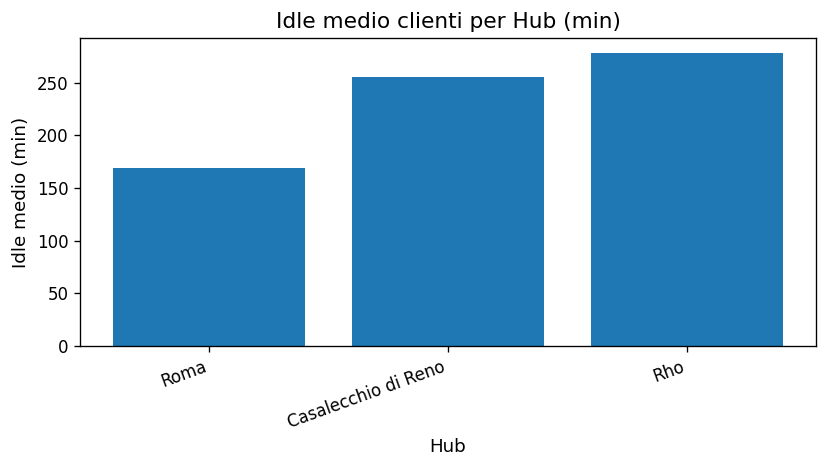

In [46]:
plt.figure(figsize=(7,4))

plt.bar(
    hub_idle.index,
    hub_idle.values
)

plt.title("Idle medio clienti per Hub (min)", fontsize=13)
plt.xlabel("Hub", fontsize=11)
plt.ylabel("Idle medio (min)", fontsize=11)

# ❌ rimuove griglia
plt.grid(False)

# migliora leggibilità
plt.xticks(rotation=20, ha="right")
plt.tight_layout()

plt.show()


In [47]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import plotly.express as px

hub_idle_df = hub_idle.reset_index()
hub_idle_df.columns = ["Hub", "avg_idle_min"]

fig = px.bar(
    hub_idle_df,
    x="Hub",
    y="avg_idle_min",
    title="Idle medio clienti per Hub (min)",
    labels={
        "avg_idle_min": "Idle medio (min)",
        "Hub": "Hub"
    }
)

fig.update_layout(
    template="plotly_white",   # 🎨 pulito, senza griglie invasive
    title_x=0.5,
    font=dict(size=12)
)

fig.show()


In [49]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


In [50]:
courier_idle_kpi = (
    missioni_servizi
    .groupby("delivery_man_main_user_id")
    .agg(
        missions_count=("mission_id", "count"),
        avg_idle_min=("idle_time_min", "mean"),
        median_idle_min=("idle_time_min", "median"),
        avg_cycle_min=("mission_cycle_time_min", "mean"),
        pct_idle_missions=("idle_time_min", lambda x: (x > 0).mean() * 100)
    )
    .reset_index()
)

courier_idle_kpi = courier_idle_kpi[courier_idle_kpi["missions_count"] >= 20].copy()


In [53]:
top15 = courier_idle_kpi.sort_values("avg_idle_min").head(15).copy()

# 🔑 forza ID come categoria
top15["courier_id_str"] = top15["delivery_man_main_user_id"].astype(str)


In [54]:
import plotly.express as px

fig = px.bar(
    top15,
    x="courier_id_str",
    y="avg_idle_min",
    title="Top 15 corrieri (Idle medio più basso)",
    hover_data=[
        "missions_count",
        "pct_idle_missions",
        "avg_cycle_min"
    ],
    labels={
        "courier_id_str": "Delivery man main user ID",
        "avg_idle_min": "Idle medio (min)"
    }
)

fig.update_layout(
    template="plotly_white",
    title_x=0.5,
    xaxis_type="category"   # 🔒 blocca l’asse come categoriale
)

fig.show()


In [55]:
import plotly.express as px

top15_fast = (
    courier_idle_kpi
    .sort_values("avg_cycle_min")   # più basso = più veloce
    .head(15)
    .copy()
)

top15_fast["courier_id_str"] = top15_fast["delivery_man_main_user_id"].astype(str)

fig = px.bar(
    top15_fast,
    x="courier_id_str",
    y="avg_cycle_min",
    title="Top 15 corrieri più veloci (Cycle time medio più basso)",
    hover_data=["missions_count", "avg_idle_min", "pct_idle_missions"],
    labels={
        "courier_id_str": "Delivery man main user ID",
        "avg_cycle_min": "Cycle time medio (min)"
    }
)

fig.update_layout(template="plotly_white", title_x=0.5, xaxis_type="category")
fig.update_xaxes(categoryorder="total ascending")
fig.show()


In [56]:
top15_drive_fast = (
    courier_kpi
    .sort_values("avg_drive_min")
    .head(15)
    .copy()
)

top15_drive_fast["courier_id_str"] = top15_drive_fast["delivery_man_main_user_id"].astype(str)

fig = px.bar(
    top15_drive_fast,
    x="courier_id_str",
    y="avg_drive_min",
    title="Top 15 corrieri più veloci (Drive time medio più basso)",
    hover_data=["missions_count", "avg_onsite_min", "avg_return_min"],
    labels={
        "courier_id_str": "Delivery man main user ID",
        "avg_drive_min": "Drive time medio (min)"
    }
)

fig.update_layout(template="plotly_white", title_x=0.5, xaxis_type="category")
fig.update_xaxes(categoryorder="total ascending")
fig.show()


In [57]:
import plotly.express as px
import pandas as pd
import numpy as np

# opzionale: per grafici puliti
TEMPLATE = "plotly_white"


In [62]:
client_features.columns


Index(['place_id', 'missions_count', 'avg_cycle_min', 'avg_service_min',
       'avg_idle_min', 'median_idle_min', 'pct_idle_missions'],
      dtype='object')

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Feature per clustering (puoi cambiarle, ma queste vanno bene)
features = [
    "missions_count",
    "avg_cycle_min",
    "avg_service_min",
    "avg_idle_min",
    "pct_idle_missions"
]

# (opzionale ma consigliato) filtra clienti con poche missioni
client_features_for_model = client_features[client_features["missions_count"] >= 10].copy()

X = client_features_for_model[features].copy()

# Standardizzazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
client_features_for_model["cluster"] = kmeans.fit_predict(X_scaled)

# Riporta la colonna cluster dentro client_features (tutti i place_id)
client_features = client_features.merge(
    client_features_for_model[["place_id", "cluster"]],
    on="place_id",
    how="left"
)

client_features["cluster"].value_counts(dropna=False)


cluster
NaN    336
1.0    212
3.0     18
0.0     11
2.0      2
Name: count, dtype: int64

In [64]:
client_features_geo = client_features_geo.merge(
    client_features[["place_id", "cluster"]],
    on="place_id",
    how="left"
)

client_features_geo["cluster"].value_counts(dropna=False)


cluster
1.0    814
NaN    526
3.0     67
0.0     58
2.0     52
Name: count, dtype: int64

In [65]:
import plotly.express as px

TEMPLATE = "plotly_white"

# Tieni solo righe con cluster assegnato
dfc = client_features_geo.dropna(subset=["cluster"]).copy()
dfc["cluster"] = dfc["cluster"].astype(str)   # cluster come categoria (etichette pulite)
dfc["place_id_str"] = dfc["place_id"].astype(str)


In [66]:
counts = dfc["cluster"].value_counts().sort_index().reset_index()
counts.columns = ["cluster", "n_clients"]

fig = px.bar(
    counts, x="cluster", y="n_clients",
    title="Distribuzione clienti per cluster",
    labels={"cluster": "Cluster", "n_clients": "Numero clienti"},
)
fig.update_layout(template=TEMPLATE, title_x=0.5)
fig.show()


In [67]:
fig = px.scatter(
    dfc,
    x="avg_cycle_min",
    y="avg_idle_min",
    color="cluster",
    size="missions_count",
    hover_data=["place_id_str", "city", "provincia", "Hub", "pct_idle_missions"],
    title="Clienti: Cycle time vs Idle time (per cluster)",
    labels={"avg_cycle_min": "Cycle medio (min)", "avg_idle_min": "Idle medio (min)"}
)
fig.update_layout(template=TEMPLATE, title_x=0.5)
fig.show()


In [68]:
features = ["missions_count", "avg_cycle_min", "avg_service_min", "avg_idle_min", "pct_idle_missions"]

profile = (
    dfc.groupby("cluster")[features]
    .mean()
    .reset_index()
)

profile_long = profile.melt(
    id_vars="cluster",
    value_vars=features,
    var_name="feature",
    value_name="value"
)

fig = px.bar(
    profile_long,
    x="feature", y="value",
    color="cluster",
    barmode="group",
    title="Profilo medio dei cluster (feature principali)",
    labels={"feature": "Feature", "value": "Valore medio", "cluster": "Cluster"}
)
fig.update_layout(template=TEMPLATE, title_x=0.5)
fig.show()


In [69]:
fig = px.box(
    dfc,
    x="cluster",
    y="avg_idle_min",
    points="all",
    title="Distribuzione dell’Idle medio per cluster",
    labels={"cluster": "Cluster", "avg_idle_min": "Idle medio (min)"}
)
fig.update_layout(template=TEMPLATE, title_x=0.5)
fig.show()
